## Q1

In [4]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np
from util_func import show_img
import matplotlib.pyplot as plt

np.random.seed(99)

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

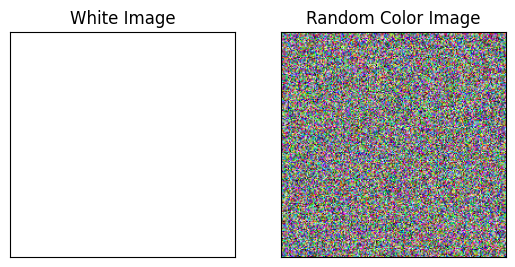

In [5]:

#random color image
random_color_img = np.random.randint(0,high=256,size=(200,200,3),dtype=np.uint8)

#create a white image
white = np.zeros((200,200)) + 255 # "uint8"
white = np.uint8(white)
#white = white.astype(""uint8) alt way
    
plt.subplot(1, 2, 1)
plt.imshow(white, cmap=plt.cm.gray, vmin=0, vmax=256)
plt.title("White Image")
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(random_color_img)
plt.title("Random Color Image")
plt.xticks([]), plt.yticks([])

plt.show()

## Q2

In [6]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    img_copy = img.copy()
    h,w = img.shape[:2]
    M,N = int(h / num_vertical_grid), int(w/ num_horizontal_grid)
    tiles = []
    #  start, end, interval
    for y in range( 0,   h,     M):
        #  start, end, interval
        for x in range(   0,    w,     N):
            x1 = x + N
            y1 = y + M
            
            if x1 > w and y1 > h:
                x1 = w - 1
                y1 = h - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:h, x:w]
                tiles.append(tile)
            
            elif x1 > w:
                x1 = w - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:y1, x:w]
                tiles.append(tile)
        
            elif y1 > h:
                y1 = h - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:h, x:x1]
                tiles.append(tile)
        
            else:
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:y1, x:x1]
                tiles.append(tile)
                
    return img_copy


image_path = "images/lena.jfif" 
img = cv.imread(image_path)

# Set the number of patches along x and y axes
num_horizontal_grid = 5
num_vertical_grid = 5

# Set the line color (BGR format)
line_color = (0, 255, 0)  

# Crop the image and draw grid lines
image_with_grid = crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)

# Display the image with grid lines
cv.imshow("Image with Grid Lines", image_with_grid)
cv.waitKey(0)
cv.destroyAllWindows()

## Q3


In [7]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

h,w = img.shape[:2]
img2 = cv.resize(img2, (w,h))

alpha1 = 0
alpha2 = 1
num_steps = 20
step_size = (alpha2 - alpha1) / num_steps

for i in range(num_steps + 1):
    alpha = alpha1 + step_size * i
    res = cv.addWeighted(img, alpha, img2, 1 - alpha, 0)
    cv.imshow("Blending Result", res)
    cv.waitKey(100)  

cv.waitKey(0)
cv.destroyAllWindows()

## Q4

In [8]:

img = cv.imread("images/lena.jfif")

# Add a text watermark to the image
watermark_text = "BIU BIU BIU"
font = cv.FONT_HERSHEY_SIMPLEX
font_scale = 0.6
font_thickness = 2
font_color = (0, 0, 0) ##black color

# Get the size of the text
(text_width, text_height), _ = cv.getTextSize(watermark_text, font, font_scale, font_thickness)

# Set the position of the text watermark (bottom-left corner)
pos_x, pos_y = 10, img.shape[0] - 10

# Put the text watermark on the image
cv.putText(img, watermark_text, (pos_x, pos_y), font, font_scale, font_color, font_thickness)

# Display the original image with the text watermark
cv.imshow("Image with Watermark", img)

cv.waitKey(0)
cv.destroyAllWindows()